In [14]:
## conda env Weather_Prediction

import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
## load the data

full_df = pd.read_pickle("2010_data.pkl")
full_df=full_df.drop(columns=['location_name', 'fips', 'year', 'NAME', 'geometry'],axis=1)
pd.set_option('display.max_columns', None)
full_df

,MeanLifeExpectency,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,msl,omaod550,pm2p5,pm10,ssaod550,asn,rsn,sd,suaod550,sp,tsn,aod550,tcco,tc_c2h6,tchcho,tc_oh,tc_c5h8,tc_ch4,tc_hno3,tcno2,tc_no,gtco3,tc_pan,tc_c3h8,tcso2,tcw,tcwv,aermssdus,aermssdum,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
0,75.728489,283.454410,291.089093,0.006284,0.01800,0.010721,3.928873,2.633910,101693.509736,0.075966,1.445389e-08,1.981001e-08,0.007574,0.878745,271.096109,0.005542,0.071412,100187.304165,272.665101,0.171956,0.000890,0.000003,4.351195e-06,4.876012e-09,3.973694e-06,0.009891,0.000005,0.000003,4.658415e-07,0.006583,0.000009,6.953380e-07,2.916594e-06,25.766945,25.620820,2.109251e-06,4.289945e-06,3.297524e-06,1.285140e-07,0.000003,5.390907e-07,0.000013,2.305156e-07,0.000016,1.011381e-06,0.000008,1.620365e-06
1,77.826608,286.767193,292.241782,0.006410,0.01527,0.013597,3.930011,2.508253,101685.471788,0.072641,1.346257e-08,1.847324e-08,0.010417,0.879538,193.698250,0.004818,0.069880,101309.280631,275.408300,0.172946,0.000875,0.000003,3.513297e-06,4.926652e-09,2.062545e-06,0.010006,0.000005,0.000003,4.380713e-07,0.006433,0.000008,6.623504e-07,2.408668e-06,27.838995,27.701486,2.641386e-06,5.453165e-06,4.363785e-06,1.200844e-07,0.000002,5.609629e-07,0.000013,2.891494e-07,0.000021,2.088636e-06,0.000008,1.140217e-06
2,75.841973,284.124711,291.030084,0.006434,0.01800,0.010576,4.154440,2.339233,101690.626048,0.073790,1.528844e-08,2.094088e-08,0.007874,0.879026,245.431868,0.006236,0.067283,100229.513473,272.708199,0.165957,0.000885,0.000003,4.161191e-06,4.878442e-09,3.484876e-06,0.009897,0.000005,0.000003,4.412445e-07,0.006521,0.000009,6.841318e-07,2.561723e-06,26.076443,25.936913,2.072566e-06,4.220296e-06,3.329836e-06,1.460098e-07,0.000002,5.375428e-07,0.000013,2.383421e-07,0.000016,1.124706e-06,0.000008,1.212712e-06
3,73.705432,283.448675,290.734945,0.006233,0.01800,0.010422,3.859579,2.695780,101696.274163,0.077023,1.467121e-08,2.014099e-08,0.007201,0.878604,274.363643,0.005314,0.073008,100215.778699,272.652578,0.173887,0.000894,0.000003,4.369584e-06,4.879895e-09,3.844808e-06,0.009893,0.000005,0.000004,5.053737e-07,0.006622,0.000009,7.044878e-07,3.263775e-06,25.607194,25.458810,2.049331e-06,4.173433e-06,3.204589e-06,1.257123e-07,0.000003,5.365352e-07,0.000013,2.220161e-07,0.000015,9.132320e-07,0.000008,1.971961e-06
4,75.753407,282.868247,289.766565,0.006107,0.01800,0.008332,3.234586,2.781183,101710.006570,0.077158,1.519334e-08,2.097774e-08,0.006178,0.877193,276.665988,0.006156,0.074710,99027.783845,272.614234,0.172485,0.000889,0.000003,4.043741e-06,4.893173e-09,2.631260e-06,0.009770,0.000005,0.000004,5.254242e-07,0.006689,0.000009,7.188703e-07,3.696579e-06,24.042930,23.889293,1.644247e-06,3.319324e-06,2.564080e-06,1.292652e-07,0.000003,5.195765e-07,0.000013,1.988160e-07,0.000013,7.093172e-07,0.000008,2.447597e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,77.582422,268.842111,278.301219,0.004760,0.01800,0.004101,2.370862,0.499930,101630.449624,0.043633,7.253336e-09,1.103061e-08,0.005092,0.798388,288.873684,0.016426,0.023886,78530.596578,268.911264,0.081471,0.000644,0.000003,1.057299e-06,4.941603e-09,8.047194e-08,0.007655,0.000003,0.000002,4.937694e-07,0.006915,0.000005,5.093373e-07,1.734801e-06,7.928388,7.855770,5.407217e-07,1.250976e-06,3.762784e-06,9.304454e-08,0.000002,4.126463e-07,0.000008,2.043045e-07,0.000013,9.202822e-07,0.000003,1.312529e-06
3123,83.771012,267.887551,274.410086,0.004909,0.01800,0.001664,2.481296,2.428177,101634.772736,0.046080,6.861324e-09,9.790676e-09,0.006100,0.807739,305.402204,0.095034,0.021758,75497.845779,268.751272,0.080511,0.000615,0.000003,8.352510e-07,4.851321e-09,7.964809e-08,0.007339,0.000003,0.000001,2.701267e-07,0.007030,0.000004,4.969263e-07,5.508047e-07,6.659885,6.563536,2.826886e-07,6.105456e

In [3]:
full_df.info() ## check if there are any null values

<class 'pandas.core.frame.DataFrame'>
Index: 3078 entries, 0 to 3126
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MeanLifeExpectency  3078 non-null   float64
 1   d2m                 3078 non-null   float64
 2   t2m                 3078 non-null   float64
 3   bcaod550            3078 non-null   float64
 4   chnk                3078 non-null   float64
 5   duaod550            3078 non-null   float64
 6   lai_hv              3078 non-null   float64
 7   lai_lv              3078 non-null   float64
 8   msl                 3078 non-null   float64
 9   omaod550            3078 non-null   float64
 10  pm2p5               3078 non-null   float64
 11  pm10                3078 non-null   float64
 12  ssaod550            3078 non-null   float64
 13  asn                 3078 non-null   float64
 14  rsn                 3078 non-null   float64
 15  sd                  3078 non-null   float64
 16  suaod550   

In [4]:
full_df.describe()

,MeanLifeExpectency,d2m,t2m,bcaod550,chnk,duaod550,lai_hv,lai_lv,msl,omaod550,pm2p5,pm10,ssaod550,asn,rsn,sd,suaod550,sp,tsn,aod550,tcco,tc_c2h6,tchcho,tc_oh,tc_c5h8,tc_ch4,tc_hno3,tcno2,tc_no,gtco3,tc_pan,tc_c3h8,tcso2,tcw,tcwv,aermssdus,aermssdum,aermssdul,aermssbchphil,aermssomhphil,aermssbchphob,aermssomhphob,aermsssss,aermssssm,aermssssl,aermsssu,aermssso2
count,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3078.000000,3078.000000,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3.078000e+03
mean,77.555393,279.286740,286.322819,0.006194,0.017666,0.006158,2.573061,1.782905,101581.266338,0.073482,1.277769e-08,1.792885e-08,0.006398,0.858064,266.819290,0.028625,0.053386,96583.198461,272.224828,0.145618,0.000869,3.362872e-06,2.659128e-06,4.948213e-09,1.158572e-06,0.009513,5.158954e-06,0.000004,5.233296e-07,0.006899,0.000008,7.340165e-07,2.390900e-06,19.697165,19.553388,1.106267e-06,2.296085e-06,2.913133e-06,1.410362e-07,2.983671e-06,5.170859e-07,0.000012,2.137574e-07,0.000014,1.251198e-06,0.000006,1.542041e-06
std,2.356462,4.246436,4.259550,0.000881,0.000913,0.003662,1.159839,0.792264,99.828156,0.014171,3.126344e-09,4.282502e-09,0.004102,0.020141,36.739171,0.030665,0.017609,5314.340519,1.945881,0.030615,0.000070,2.324833e-07,9.268329e-07,9.922277e-11,1.091921e-06,0.000546,9.881726e-07,0.000001,1.545441e-07,0.000296,0.000001,9.639952e-08,1.020294e-06,5.193966,5.185896,7.117862e-07,1.466597e-06,1.757448e-06,3.382005e-08,7.124508e-07,6.724024e-08,0.000002,7.892924e-08,0.000007,1.952386e-06,0.000002,8.543425e-07
min,66.689077,266.760395,274.327385,0.002814,0.010909,0.001001,0.000000,0.000000,101086.899528,0.026523,5.638565e-09,8.107678e-09,0.002529,0.787406,99.999992,0.000000,0.016826,70480.888529,267.779697,0.055840,0.000550,2.236918e-06,8.352510e-07,4.450208e-09,1.899933e-08,0.006843,2.425352e-06,0.000001,2.567314e-07,0.005997,0.000004,4.160076e-07,5.018396e-07,6.090429,6.020432,1.831823e-07,3.964977e-07,4.028663e-07,5.562463e-08,1.117594e-06,2.433519e-07,0.000005,1.365104e-07,0.000007,3.598629e-07,0.000002,2.363047e-07
25%,75.929472,276.720872,283.164976,0.005864,0.017979,0.003373,1.883848,1.180005,101538.329496,0.066052,1.042362e-08,1.471902e-08,0.004273,0.845104,274.260192,0.008554,0.036700,96033.279578,271.423177,0.122706,0.000855,3.318419e-06,1.884001e-06,4.899179e-09,2.180920e-07,0.009453,4.623275e-06,0.000003,4.377507e-07,0.006696,0.000007,6.834107e-07,1.551236e-06,16.507101,16.345731,5.568806e-07,1.183389e-06,1.683175e-06,1.227414e-07,2.517433e-06,4.934364e-07,0.000011,1.702167e-07,0.000010,4.756858e-07,0.000004,8.705527e-07
50%,77.678138,279.303623,286.446575,0.006270,0.018000,0.005318,2.662294,1.796283,101599.889047,0.077047,1.350908e-08,1.884730e-08,0.004840,0.863657,278.128581,0.019291,0.058593,98218.784548,272.078343,0.153735,0.000890,3.410000e-06,2.665413e-06,4.946593e-09,7.110256e-07,0.009680,5.317053e-06,0.000004,5.029050e-07,0.006915,0.000008,7.353341e-07,2.299754e-06,19.709306,19.544691,9.133953e-07,1.890944e-06,2.545522e-06,1.369290e-07,2.977997e-06,5.266984e-07,0.000012,1.858302e-07,0.000011,6.360499e-07,0.000006,1.357067e-06
75%,79.149448,282.102890,289.648420,0.006715,0.018000,0.007911,3.358631,2.548943,101654.163409,0.083099,1.499439e-08,2.086808e-08,0.007205,0.876106,281.693064,0.039002,0.068899,99794.438539,272.707335,0.170116,0.000913,3.506349e-06,3.456460e-06,4.996222e-09,2.065373e-06,0.009845,5.815881e-06,0.000004,5.806062e-07,0.007119,0.000009,7.920873e-07,3.029549e-06,23.312181,23.178155,1.456397e-06,2.988685e-06,3.920587e-06,1.595545e-07,3.562753e-06,5.581

In [5]:
## Lets create a Train-Test set

features=full_df.drop('MeanLifeExpectency',axis=1)
target=full_df['MeanLifeExpectency'].copy()

#from sklearn.model_selection import train_test_split
## the random state will not be included so that the data will be shuffled

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.10) #random_state=42)


#### After the cell below, the X_train and y_train, which is 90% of the original data is divided into 89% train and 11% validation. Thus the validation set is 0.90 X 0.11=0.099 (~ 10%) of the original data. The test set above is untouched, so remains 10% and the training set is 0.89 X 0.90 =80.01 ( ~ 80%) of the total data. 
#### We thus get 80% train, 10% validation and 10% test set.

In [6]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.11)

#### Note that the linear regression model, does not have any hyperparameter to optimize. So, lets revert back to the original train, test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20) #random_state=42)

In [8]:
## fit the model and find the error in the traning set

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

train_prediction=lin_reg.predict(X_train)

mse_train=mean_squared_error(y_train, train_prediction)
rmse_train=np.sqrt(mse_train)
rmse_train=int(rmse_train*100)/100 ## display only two digits without rounding

print('The train RMSE using linear regression :::', '%.2f' % rmse_train)

The train RMSE using linear regression ::: 1.62


In [9]:
## The test prediction

test_prediction=lin_reg.predict(X_test)

mse_test=mean_squared_error(y_test,test_prediction)
rmse_test=np.sqrt(mse_test)
rmse_test=int(rmse_test*100)/100 

print('The test RMSE using linear regression :::', '%.2f' % rmse_test)

The test RMSE using linear regression ::: 1.67


In [10]:
## the train r square

train_r_sq=(pearsonr(y_train,train_prediction)[0])**2
corr_train=int(train_r_sq*100)/100 ## display only two digits without rounding

print('The train r_sq using linear regression :::', '%.2f' % corr_train)

The train r_sq using linear regression ::: 0.52


In [11]:
## The test r square

test_r_sq=(pearsonr(y_test,test_prediction)[0])**2
corr_test=int(test_r_sq*100)/100 ## display only two digits without rounding

print('The test r_sq using linear regression :::', '%.2f' % corr_test)

The test r_sq using linear regression ::: 0.48


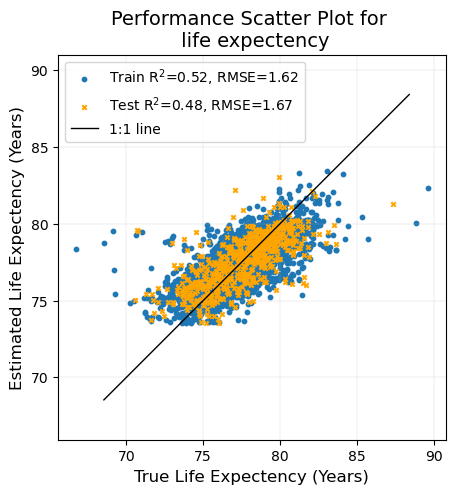

In [12]:
## scatter plot

plt.figure(figsize=(5,5))

plt.scatter(y_train, train_prediction,s=10,c='C0',label='Train R$^2$={}, RMSE={}'.format(corr_train, rmse_train))

plt.scatter(y_test, test_prediction,marker='x',s=10,c='orange',
                                      label='Test R$^2$={}, RMSE={}'.format(corr_test,rmse_test))

## 5 has been added/substracted below so that the line extends beyond

plt.plot([min(train_prediction)-5, max(train_prediction)+5], [min(train_prediction)-5, max(train_prediction)+5],
                                                         color='black', label='1:1 line', linewidth=1)


plt.xlabel('True Life Expectency (Years)', fontsize=12)
plt.ylabel('Estimated Life Expectency (Years)', fontsize=12)
plt.axis('equal')
plt.title("Performance Scatter Plot for \n life expectency", fontsize=14)
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()

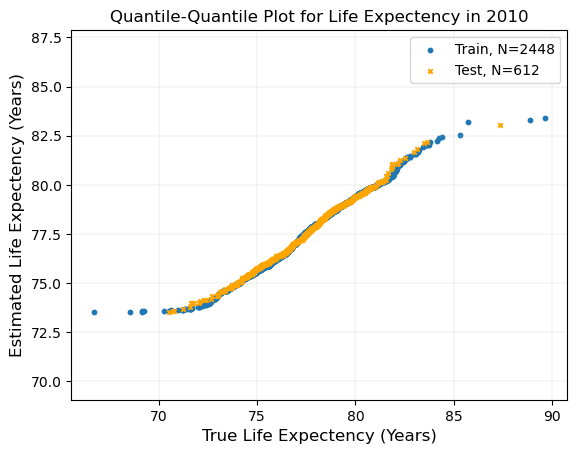

In [40]:
## Quantile-Quantile plot

## lets plot the quantile-quantile plot
## note that since the estimated values and the true values have the same number, sorting the
## true and estimated values and plotting it will do the task

true_train=np.sort(y_train)
est_train=np.sort(train_prediction)

true_test=np.sort(y_test)
est_test=np.sort(test_prediction)

plt.scatter(true_train,est_train,s=10,c='C0')
plt.scatter(true_test,est_test,s=10,marker='x',c='orange')


plt.xlabel('True Life Expectency (Years)', fontsize=12)
plt.ylabel('Estimated Life Expectency (Years)', fontsize=12)
plt.axis('equal')

plt.title("Quantile-Quantile Plot for Life Expectency in 2010", fontsize=12)
plt.legend()
plt.grid(axis='both',linewidth=0.15)
plt.show()